# MERGE012
Best of Each Type as of July 13

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error

def group_mean_log_mae(y_true, y_pred, groups, floor=1e-9):
    maes = (y_true-y_pred).abs().groupby(groups).mean()
    return np.log(maes.map(lambda x: max(x, floor))).mean()

In [3]:
tracking = pd.read_csv('../tracking/tracking.csv')

In [4]:
tracking.head()

,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,...,2JHC_meta_fc_est,2JHC_meta_fc_metafolds,2JHC_meta_fc_mae_cv_f1,2JHC_meta_fc_mae_cv_f2,3JHC_meta_fc_est,3JHC_meta_fc_metafolds,3JHC_meta_fc_mae_cv_f1,3JHC_meta_fc_mae_cv_f2,1JHN_meta_fc_est,1JHN_meta_fc_metafolds
0,0610_1341,M010,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0611_0308,M012,mae,500000.0,500.0,529.0,32.0,0.5,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0611_1250,M013,mae,50000.0,500.0,529.0,32.0,0.5,5.0,catboost,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0611_1249,M014,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0613_0402,M015,mae,500000.0,500.0,529.0,24.0,0.3,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for cv in ['1JHC_mae_cv', '2JHH_mae_cv', '1JHN_mae_cv',
          '2JHN_mae_cv', '2JHC_mae_cv', '3JHH_mae_cv',
          '3JHC_mae_cv', '3JHN_mae_cv']:
    print(f'----------{cv}----------')
    print(tracking[['model_number','run_id','model_type', cv]] \
          .set_index('model_number') \
          .sort_values(cv) \
          .head())

----------1JHC_mae_cv----------
                 run_id model_type  1JHC_mae_cv
model_number                                   
M046_1JHC     0712_2026   catboost       0.4976
M043          0710_2124   catboost       0.5124
M045_1JHC     0711_2313   catboost       0.5244
M044          0711_1936   catboost       0.5376
M042          0709_1336   catboost       0.5650
----------2JHH_mae_cv----------
                 run_id model_type  2JHH_mae_cv
model_number                                   
M043          0710_2124   catboost       0.1382
M038          0707_0907   catboost       0.1405
M040          0708_1639   catboost       0.1421
M042          0709_1336   catboost       0.1428
M039          0708_1415   catboost       0.1440
----------1JHN_mae_cv----------
                 run_id model_type  1JHN_mae_cv
model_number                                   
M030          0701_1300       lgbm       0.3582
M043          0710_2124   catboost       0.3764
M035          0704_2344       lgbm      

In [7]:
# 1JHC - M046_1JHC
# 2JHH - M043
# 1JHN - M030
# 2JHN - M031
# 2JHC - M046_2JHC
# 3JHH - M038
# 3JHC - M046_3JHC
# 3JHN - M038

sub_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_submission_lgb_3folds_5000000iter_0.05lr.csv')
oof_M031 = pd.read_csv('../temp/M031/temp4of8_M031_0702_0822_oof_lgb_3folds_5000000iter_0.05lr.csv')
sub_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_submission_catboost_2folds_500000iter_0.08lr.csv')
oof_M038 = pd.read_csv('../temp/M038/temp6of8_M038_0707_0907_oof_catboost_2folds_500000iter_0.08lr.csv')

sub_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_submission_lgb_3folds_5000000iter_0.05lr.csv')
sub_M030 = sub_M030_a.copy()
sub_M030['scc_a'] = sub_M030_a['scalar_coupling_constant']
sub_M030['scc_b'] = sub_M030_b['scalar_coupling_constant']
sub_M030['scc_c'] = sub_M030_c['scalar_coupling_constant']
sub_M030['scalar_coupling_constant'] = sub_M030[['scc_a','scc_b','scc_c']].mean(axis=1)
sub_M030 = sub_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

oof_M030_a = pd.read_csv('../temp/M030/temp4of8_M030_0701_1300_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_b = pd.read_csv('../temp/M030/temp4of8_M030_0701_1302_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030_c = pd.read_csv('../temp/M030/temp4of8_M030_0701_1304_oof_lgb_3folds_5000000iter_0.05lr.csv')
oof_M030 = oof_M030_a.copy()
oof_M030['scc_a'] = oof_M030_a['oof_preds']
oof_M030['scc_b'] = oof_M030_b['oof_preds']
oof_M030['scc_c'] = oof_M030_c['oof_preds']
oof_M030['oof_preds'] = oof_M030[['scc_a','scc_b','scc_c']].sum(axis=1)
oof_M030 = oof_M030.drop(['scc_a','scc_b','scc_c'], axis=1).copy()

In [8]:
oof_M043 = pd.read_csv('../oof/M043_0710_2124_oof_catboost_2folds_-1.5582CV_500000iter_0.1lr.csv')
sub_M043 = pd.read_csv('../submissions/M043_0710_2124_submission_lgb_2folds_-1.5582CV_500000iter_0.1lr.csv')
sub_M043 = sub_M043.sort_values('id').reset_index(drop=True)
oof_M043 = oof_M043.sort_values('id').reset_index(drop=True)

In [9]:
oof_M046_1JHC = pd.read_parquet('../type_results/1JHC/M046_1JHC_0712_2026_oof_0.4976_catboost_2folds_500000iter_0.1lr.parquet')
sub_M046_1JHC = pd.read_parquet('../type_results/1JHC/M046_1JHC_0712_2026_sub_0.4976_catboost_2folds_500000iter_0.1lr.parquet')

In [10]:
oof_M046_2JHC = pd.read_parquet('../type_results/2JHC/M046_2JHC_0713_0745_oof_0.1957_catboost_2folds_500000iter_0.1lr.parquet')
sub_M046_2JHC = pd.read_parquet('../type_results/2JHC/M046_2JHC_0713_0745_sub_0.1957_catboost_2folds_500000iter_0.1lr.parquet')

In [11]:
oof_M046_3JHC = pd.read_parquet('../type_results/3JHC/M046_3JHC_0713_1412_oof_0.2216_catboost_2folds_500000iter_0.1lr.parquet')
sub_M046_3JHC = pd.read_parquet('../type_results/3JHC/M046_3JHC_0713_1412_sub_0.2216_catboost_2folds_500000iter_0.1lr.parquet')

In [72]:
oof_M030.loc[oof_M030['type'] == '1JHN'].head()

,id,type,scalar_coupling_constant,oof_preds
10,10,1JHN,32.6889,40.055154
13,13,1JHN,32.6891,40.054518
15,15,1JHN,32.6905,40.055154
97,97,1JHN,55.5252,56.008177
101,101,1JHN,54.7359,56.825605


In [41]:
# 1JHC - M046_1JHC
# 2JHH - M043
# 1JHN - M030
# 2JHN - M031
# 2JHC - M046_2JHC
# 3JHH - M038
# 3JHC - M046_3JHC
# 3JHN - M038
oof_final = oof_M031[['id','type','scalar_coupling_constant']].copy()
oof_final = oof_final.merge(oof_M046_1JHC[['id','oof_preds']], on='id', how='left', suffixes=('','_1JHC'))
oof_final = oof_final.merge(oof_M046_2JHC[['id','oof_preds']], on='id', how='left', suffixes=('','_2JHC'))
oof_final = oof_final.merge(oof_M046_3JHC[['id','oof_preds']], on='id', how='left', suffixes=('','_3JHC'))
oof_final.loc[oof_final['type'] == '2JHH', 'oof_preds_2JHH'] = oof_M043.loc[oof_M043['type'] == '2JHH']['oof_preds']
oof_final.loc[oof_final['type'] == '1JHN', 'oof_preds_1JHN'] = oof_M030.loc[oof_M030['type'] == '1JHN']['oof_preds']
oof_final.loc[oof_final['type'] == '2JHN', 'oof_preds_2JHN'] = oof_M031.loc[oof_M031['type'] == '2JHN']['oof_preds']
oof_final.loc[oof_final['type'] == '3JHH', 'oof_preds_3JHH'] = oof_M038.loc[oof_M038['type'] == '3JHH']['oof_preds']
oof_final.loc[oof_final['type'] == '3JHN', 'oof_preds_3JHN'] = oof_M038.loc[oof_M038['type'] == '3JHN']['oof_preds']

In [46]:
oof_final['oof_combined'] = oof_final[['oof_preds', 'oof_preds_2JHC',
       'oof_preds_3JHC', 'oof_preds_2JHH', 'oof_preds_1JHN', 'oof_preds_2JHN',
       'oof_preds_3JHH', 'oof_preds_3JHN']].sum(axis=1)

In [63]:
ss = pd.read_csv('../input/test.csv')
ss = ss.merge(sub_M046_1JHC.loc[sub_M046_1JHC['type'] == '1JHC'][['id','prediction']], on='id', how='left', suffixes=('','_1JHC'))
ss = ss.merge(sub_M046_2JHC.loc[sub_M046_2JHC['type'] == '2JHC'][['id','prediction']], on='id', how='left', suffixes=('','_2JHC'))
ss = ss.merge(sub_M046_3JHC.loc[sub_M046_3JHC['type'] == '3JHC'][['id','prediction']], on='id', how='left', suffixes=('','_3JHC'))
ss.loc[ss['type'] == '2JHH', 'preds_2JHH'] = sub_M043.loc[ss['type'] == '2JHH']['scalar_coupling_constant']
ss.loc[ss['type'] == '1JHN', 'preds_1JHN'] = sub_M030.loc[ss['type'] == '1JHN']['scalar_coupling_constant']
ss.loc[ss['type'] == '2JHN', 'preds_2JHN'] = sub_M031.loc[ss['type'] == '2JHN']['scalar_coupling_constant']
ss.loc[ss['type'] == '3JHH', 'preds_3JHH'] = sub_M038.loc[ss['type'] == '3JHH']['scalar_coupling_constant']
ss.loc[ss['type'] == '3JHN', 'preds_3JHN'] = sub_M038.loc[ss['type'] == '3JHN']['scalar_coupling_constant']

In [68]:
ss['scalar_coupling_constant'] = ss[['prediction', 'prediction_2JHC', 'prediction_3JHC', 'preds_2JHH',
       'preds_1JHN', 'preds_2JHN', 'preds_3JHH', 'preds_3JHN']].sum(axis=1)

In [73]:
for i, d in oof_final.groupby('type'):
    print(i)
    print(mean_absolute_error(d['scalar_coupling_constant'], d['oof_combined']))

1JHC
0.49759548437435286
1JHN
0.35815790678334736
2JHC
0.1957371996255439
2JHH
0.13819274540620405
2JHN
0.13000911360249118
3JHC
0.2216202227144778
3JHH
0.14977686316390257
3JHN
0.11470001176414876


In [76]:
group_mean_log_mae(oof_final['scalar_coupling_constant'], oof_final['oof_combined'], oof_final['type'])

-1.618227742812593

In [77]:
sub_M025 = pd.read_csv('../submissions/M025_0629_1311_submission_lgb_2folds_-1.3265CV_500000iter_0.1lr.csv')
ss['scc_good'] = sub_M025['scalar_coupling_constant']

In [79]:
ss[['scc_good','scalar_coupling_constant']].corr()

,scc_good,scalar_coupling_constant
scc_good,1.000000,0.999911
scalar_coupling_constant,0.999911,1.000000


In [80]:
ss[['id','scalar_coupling_constant']] \
    .to_csv('../submissions/MERGE012_submission_-1.6182.csv', index=False)

In [81]:
oof_final.head()

,id,type,scalar_coupling_constant,oof_preds,oof_preds_2JHC,oof_preds_3JHC,oof_preds_2JHH,oof_preds_1JHN,oof_preds_2JHN,oof_preds_3JHH,oof_preds_3JHN,oof_combined
0,0,1JHC,84.8076,75.746881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.746881
1,1,2JHH,-11.2570,NaN,NaN,NaN,-10.350698,NaN,NaN,NaN,NaN,-10.350698
2,2,2JHH,-11.2548,NaN,NaN,NaN,-10.631398,NaN,NaN,NaN,NaN,-10.631398
3,3,2JHH,-11.2543,NaN,NaN,NaN,-10.805525,NaN,NaN,NaN,NaN,-10.805525
4,4,1JHC,84.8074,76.001890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.001890


In [82]:
oof_final[['id','type','scalar_coupling_constant','oof_combined']].to_csv('../oof/MERGE011_submission_-1.6182CV.csv', index=False)

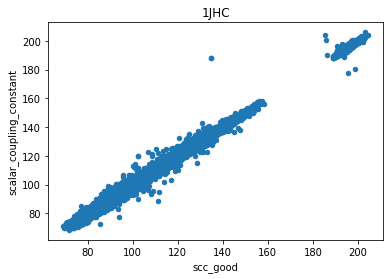

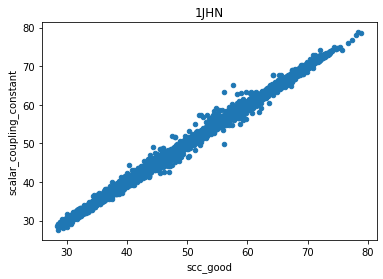

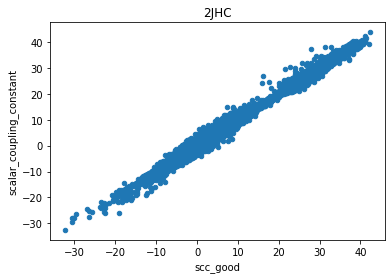

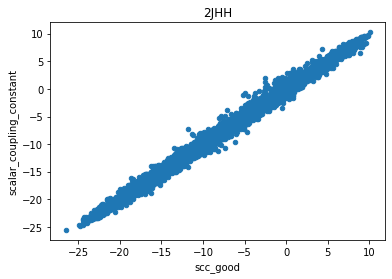

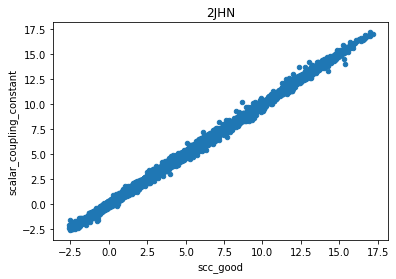

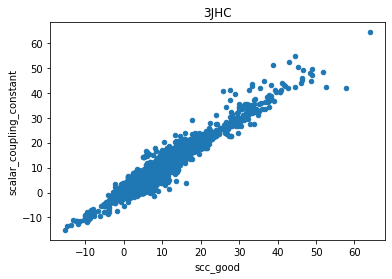

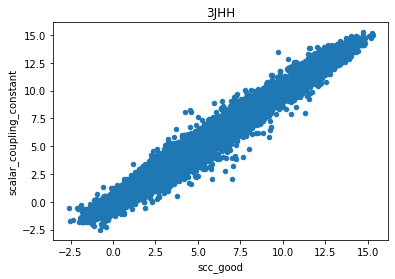

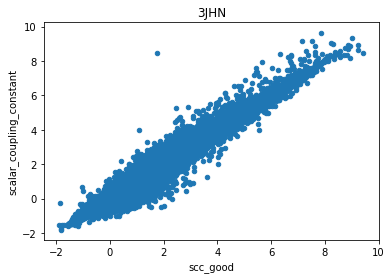

In [84]:
for i, d in ss.groupby('type'):
    d.plot(x='scc_good', y='scalar_coupling_constant', kind='scatter', title=i)
    plt.show()